In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/VIP_senior_design

/content/drive/MyDrive/VIP_senior_design


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import matplotlib.image as mimg
import cv2
from skimage import filters

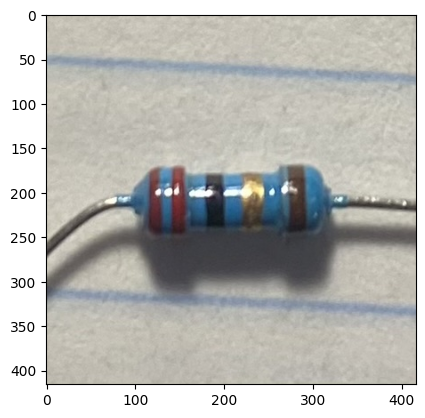

In [ ]:
# Specify the path to the image
IMG_PATH = '22ohm.JPEG'

# Load image using Mathplotlib
image = plt.imread(IMG_PATH)

plt.imshow(image)

DONE WITH GRAYSCALE


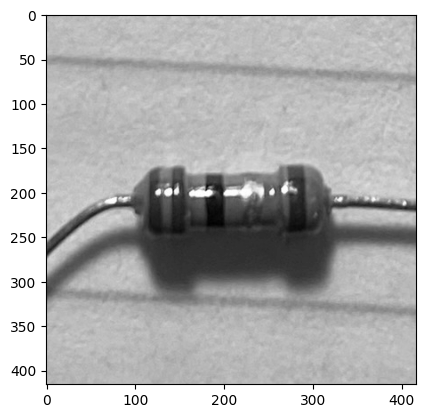

In [ ]:
def grayscale(img:np.array):
   #isolate the RGB channel of the image
    orgR = img[:, :, 0]
    orgG = img[:, :, 1]
    orgB = img[:, :, 2]

    #create greyscale image using BT.709 standard
    grayImage = 0.2126 * orgR + 0.7152 * orgG + 0.0722*orgB

    return grayImage

#image = mimg.imread(input_file)
grayScale = grayscale(image)
print("DONE WITH GRAYSCALE")

plt.imshow(grayScale, cmap='gray')


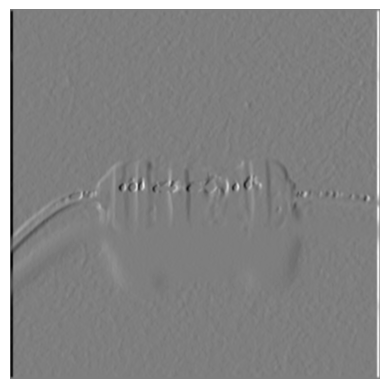

In [ ]:
# Define gaussian window
gaussianWindow = (np.array([[1,2,1],[2,4,2],[1,2,1]]))/16

# Convolve grayscale image with gaussian window to smooth image
gaussian = signal.convolve2d(grayScale , gaussianWindow)

# Set dx and dy windows
dx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]).astype(np.float64)
dy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]).astype(np.float64)

# Convolve gaussian image with dx window
gx = signal.convolve2d(gaussian, dx)
plt.axis('off')
plt.imshow(gx, cmap='gray')


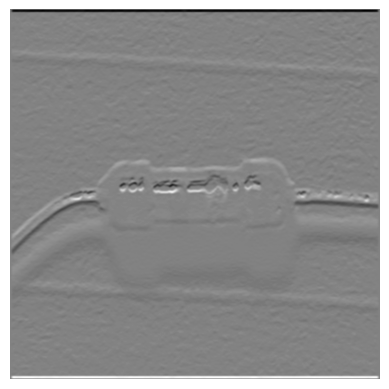

In [ ]:
gy = signal.convolve2d(gaussian, dy)
plt.axis('off')
plt.imshow(gy, cmap='gray')

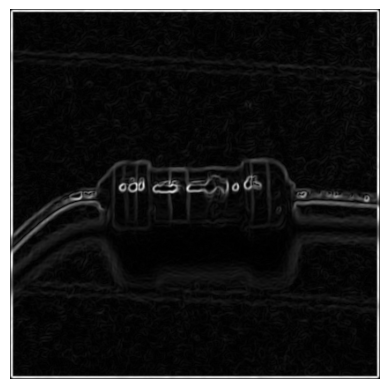

In [ ]:
# Perform RSS (Root Sume Squared on gx and gy) to create sobel
sobel = np.sqrt(gx**2 + gy**2)
plt.axis('off')
plt.imshow(sobel, cmap='gray')

In [ ]:
color_thresholds = {
    'black':   [(0, 0, 0), (40, 40, 40)],
    'brown':   [(40, 35, 30), (90, 65, 50)],
    'red':     [(120, 0, 0), (255, 70, 70)],
    'orange':  [(175, 100, 0), (255, 150, 50)],
    'yellow':  [(150, 150, 0), (255, 255, 100)],
    'green':   [(0, 150, 0), (50, 255, 50)],
    'violet':  [(80, 0, 100), (240, 120, 220)],
    'grey':    [(100, 100, 100), (200, 200, 200)],
    'white':   [(240, 240, 240), (255, 255, 255)],
    'gold':    [(200, 150, 50), (255, 200, 100)],
}

In [ ]:
'Sets the threshold of 120'
P = np.histogram(sobel,bins=256,range=(0,256))[0]

foreground mean: 255.0 Background mean 0.0 Threshold 55


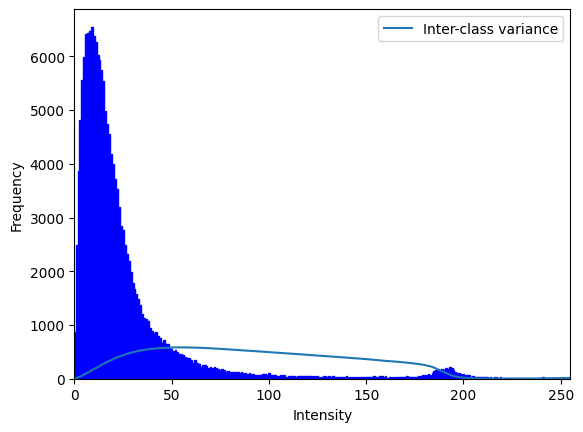

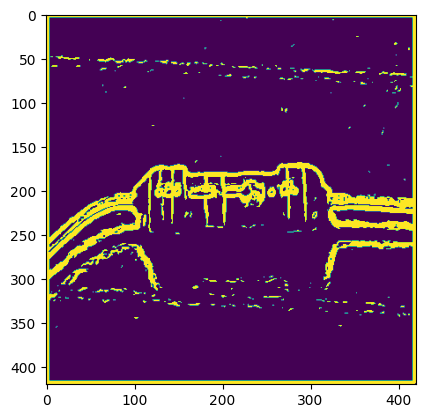

In [ ]:
'Implements Otsu Threshold'

otsu = sobel
inter_variance = []
threshold = 1
max_variance = 0
for T in range(256):
    P1 = sum(P[:T+1])/otsu.size
    P2 = 1-P1

    m1 = np.sum(np.arange(T+1) * P[:T+1]) / sum(P[:T+1])
    if(P2 == 0):
        continue
    m2 = np.sum(np.arange(T+1, 256) * P[T+1:]) / (P2 * otsu.size)


    variance = P1*P2*((m1-m2)**2)
    inter_variance.append(variance)

    if variance > max_variance:
        max_variance = variance
        threshold = T

indices = np.arange(len(P))
plt.bar(indices,P,color='blue',edgecolor='blue')
plt.xlim(0,255)
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.savefig("hist.jpg")

foreground_mean = np.mean(otsu[otsu > threshold])
background_mean = np.mean(otsu[otsu <= threshold])

print("foreground mean:", foreground_mean, "Background mean", background_mean, "Threshold", threshold )

# Create a line plot for the inter-class variance
thresholds = [i for i in range(256)]
plt.plot(thresholds,inter_variance,label = 'Inter-class variance')
plt.legend()

# Show the plot
plt.show()
plt.savefig('Thresholds.jpg')

otsu[np.where(otsu>threshold)] = 255
otsu[np.where(otsu<threshold)]=0


pool = np.zeros([int(len(otsu)/2),int(len(otsu[0])/2)])
i,j = 0,0

"Implementing max pooling with a filter size of 2x2 and stride of 2"
for x in range(0,len(otsu)-1,2):
    j=0
    for y in range(0,len(otsu[0])-1,2):
        check = otsu[x:x+2,y:y+2]
        pool[i,j] = check.max()
        j+=1
    i+=1

plt.imshow(otsu)

In [ ]:
thresh = filters.threshold_otsu(grayScale)
binary_resistor = grayScale > thresh

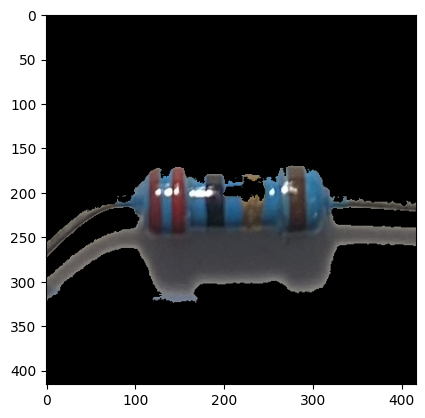

In [ ]:
from skimage import measure, morphology

#Label the image
labels = measure.label(binary_resistor)

#Find the largest object
largest_object = morphology.remove_small_objects(labels, min_size=500)
mask = largest_object > 0

from skimage import util

#Apply the mask to the original image
resistor_cropped = image.copy()
resistor_cropped[mask] = 0
plt.imshow(resistor_cropped)

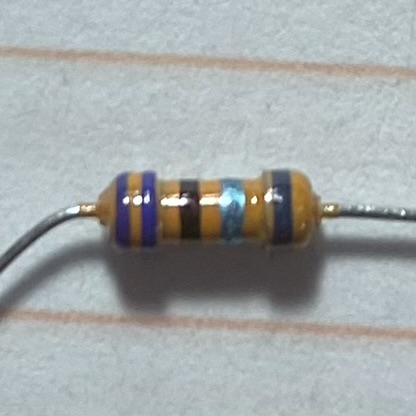

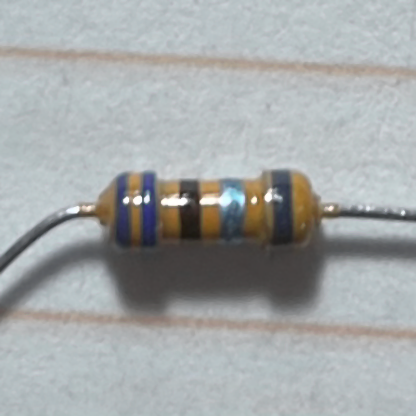

In [ ]:
teimport cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy import ndimage

def remove_salt_and_pepper(image, filter_size=3):
    # Apply median filter
    filtered_image = ndimage.median_filter(image, size=filter_size)
    return filtered_image

# Set salt and pepper probabilities (adjust these values as needed)
salt_probability = 0.01
pepper_probability = 0.01

# Add salt-and-pepper noise to the image
noisy_image = remove_salt_and_pepper(image, filter_size=3)

# Display the original and noisy images
cv2_imshow(image)
cv2_imshow(noisy_image)
